## Imports

In [1]:
import os
import sys

import numpy as np

sys.path.insert(0, './src')

from deepverse import ParameterManager
from deepverse.scenario import ScenarioManager
from deepverse import Dataset 

from deepverse.visualizers import ImageVisualizer, LidarVisualizer

## Parameter reading

In [2]:
# Create the directory if it doesn't exist
folder = 'params'
if not os.path.exists(folder):
    os.makedirs(folder)

# Path to the MATLAB configuration file
config_path = os.path.join(folder, "config.m")

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)
params = param_manager.get_params()

# # Print the loaded parameters
print("Loaded Parameters:")
print(params)

Loaded Parameters:
{'basestations': [1], 'dataset_folder': 'D:/Deepverse_data/scenarios', 'scenario': 'DT31', 'scenes': [0, 1, 2], 'comm': {'enable': True, 'bs_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [360, 180]}, 'ue_antenna': {'shape': [1, 1], 'rotation': [0, 0, 0], 'spacing': 0.5, 'FoV': [360, 180]}, 'OFDM': {'bandwidth': 0.05, 'subcarriers': 512, 'selected_subcarriers': [0, 1, 2, 3, 4, 5, 6, 7]}, 'activate_RX_filter': 0, 'generate_OFDM_channels': 1, 'num_paths': 25, 'enable_Doppler': 1}, 'radar': {'enable': True, 'tx_antenna': {'shape': [1, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'rx_antenna': {'shape': [16, 1], 'rotation': [0, 0, -45.04], 'spacing': 0.5, 'FoV': [180, 180]}, 'FMCW': {'chirp_slope': 8014000000000.0, 'Fs': 6200000.0, 'n_samples_per_chirp': 256, 'n_chirps': 256}, 'num_paths': 500}, 'camera': True, 'camera_id': ['unit1_cam1'], 'lidar': True, 'lidar_id': ['unit1_lidar'], 'position': True}


## Generate a dataset

In [3]:
%%capture
# Generate a dataset
dataset = Dataset(config_path)

## Access samples

### Access camera sample

In [4]:
camera_sample = dataset.get_sample('cam', index=0, device_index="unit1_cam1")  # Get sample from camera 1
print(camera_sample)

D:/Deepverse_data/scenarios\DT31\RGB_images\unit1_cam1\0.png


### Access LiDAR sample

In [5]:
lidar_sample = dataset.get_sample('lidar', index=0, device_index="unit1_lidar1")  # Get sample from LiDAR 1
print(lidar_sample)

D:/Deepverse_data/scenarios\DT31\lidar\unit1_lidar1\0.pcd


### Access radar sample

In [7]:
radar_sample = dataset.get_sample('radar', index=0, bs_idx=0, ue_idx=0)
# There is no UE, it is the bs_tx_idx=bs_idx and bs_rx_idx=ue_idx
# Channel can be reached with:
# radar_sample.coeffs
# ------- Some print examples ----------
# print(radar_sample)
# print(radar_sample.paths)
# print(radar_sample.waveform)
# print(radar_sample.tx_antenna)
# print(radar_sample.rx_antenna)

IndexError: list index out of range

### Access BS-UE channel sample

In [8]:
comm_sample = dataset.get_sample('comm-ue', index=0, bs_idx=0, ue_idx=0)
# Channel can be reached with:
comm_sample.coeffs
# ------- Some print examples ----------
print(comm_sample)
print(comm_sample.paths)
print(comm_sample.LoS_status)
print(comm_sample.tx_antenna)
print(comm_sample.rx_antenna)

Channel Information:
-------------------
Transmitting Antenna: Antenna - Size: [16, 1] Rot: [  0.     0.   -45.04] FoV: [360, 180] Spacing: 0.5
Receiving Antenna: Antenna - Size: [1, 1] Rot: [0 0 0] FoV: [360, 180] Spacing: 0.5
Carrier Frequency: 60000000000.0 Hz
Bandwidth: 50000000.0 Hz
Paths: Paths:
DoD_theta: [1.7043227 1.7227273 1.716102  1.5909985 1.7301345 1.7221792 1.5841132
 1.6292107 1.5266186 1.4896368 1.6093227 1.7119759 1.5796365 1.4861008
 1.4930733 1.5963776 1.5767881 1.4736861 1.4524333 1.5023096 1.4199319
 1.3783005 1.693671  1.5760375 1.6680356 1.5553869 1.5992434 1.4194309
 1.6469765 1.7246296 1.5859667 1.6012558 1.6560103 1.5342264 1.7010502
 1.6802913 1.4590569 1.5867975 1.548594  1.6978126 1.7756456 1.7230972
 1.6931928 1.6899064 1.4197556 1.6917913 1.7067261 1.690018  1.6710515
 1.5810956 1.4930122 1.4411428 1.6878015 1.5711333 1.6590227 1.7796249
 1.540288  1.5367293 1.7930291 1.4985257 1.6754115 1.468157  1.638215
 1.6509942 1.688257  1.6861434 1.4609802 1.55404

### Access BS-BS channel sample

In [17]:
comm_bs2bs_sample = dataset.get_sample('comm-bs', index=0, bs_idx=0, ue_idx=0)
# Channel can be reached with:
comm_bs2bs_sample.coeffs
# ------- Some print examples ----------
print(comm_bs2bs_sample)
print(comm_bs2bs_sample.paths)
print(comm_bs2bs_sample.LoS_status)
print(comm_bs2bs_sample.tx_antenna)
print(comm_bs2bs_sample.rx_antenna)

IndexError: list index out of range

### Access location and mobility sample

In [12]:
# Access bs location sample
bs_location = dataset.get_sample('loc-bs', index=0, bs_idx=0)
print(bs_location)

# Access user location sample
ue_location = dataset.get_sample('loc-ue', index=0, ue_idx=0)
print(ue_location)

# Access user mobility sample
mobility = dataset.get_sample('mobility', index=0, ue_idx=0)
print(mobility)

[-57.771   96.141    3.4537]
[-44.6921  94.3239   1.68  ]
{'time': 0, 'location': [-44.692145075, 94.323851295, 0], 'angle': -86.0, 'speed': 4.47, 'acceleration': 0, 'bounding_box': array([[-4.68521451e+01,  9.32738513e+01, -5.00000000e-02],
       [-4.25321451e+01,  9.53738513e+01,  1.73000000e+00]]), 'tx_height': 1.68, 'slope': 0}


## Visualization test

In [ ]:
# Visualizing scenario
# Set visualization backend for scenario and visualize samples
dataset.scenario.visualizer.set_backend('pyvista')
dataset.scenario.visualize()
# # For demonstration, let's just show how you would generate and process batches
# for batch in dataset.generate_batches():
#     # Process or save the batch
#     pass

In [ ]:
# Visualizing camera data
# Set visualization backend for camera and visualize samples
for backend in ImageVisualizer.supported_backends:
    print(f'Image Backend {backend}')
    dataset.set_visualization_backend('camera', backend)
    dataset.visualize('camera', 1, 2)

In [ ]:
# Visualizing LiDAR data
# Set visualization backend for lidar and visualize samples
for backend in LidarVisualizer.supported_backends:
    print(f'Lidar Backend {backend}')
    dataset.set_visualization_backend('lidar', backend)
    dataset.visualize('lidar', 1, 2)

## Plot BS beam power and user position

### Simple beam-steering codebook

In [13]:
def beam_steering_codebook(angles, num_z, num_x):
    d = 0.5
    k_z = np.arange(num_z)
    k_x = np.arange(num_x)
    
    codebook = []
    
    for beam_idx in range(angles.shape[0]):
        z_angle = angles[beam_idx, 0]
        x_angle = angles[beam_idx, 1]
        bf_vector_z = np.exp(1j * 2 * np.pi * k_z * d * np.cos(np.radians(z_angle)))
        bf_vector_x = np.exp(1j * 2 * np.pi * k_x * d * np.cos(np.radians(x_angle)))
        bf_vector = np.outer(bf_vector_z, bf_vector_x).flatten()
        codebook.append(bf_vector)
    
    return np.stack(codebook, axis=0)

# Construct beam steering codebook
num_angles = 64
x_angles = np.linspace(0, 180, num_angles + 1)[1:]
x_angles = np.flip(x_angles)
z_angles = np.full(num_angles, 90)
beam_angles = np.column_stack((z_angles, x_angles))
codebook = beam_steering_codebook(beam_angles, 1, 16)

### Apply beam-steering codebook to channels

In [14]:
# Apply codebook to bs-ue comm channel
beam_power = []
ue_loc = []
num_scene = len(dataset.params['scenes'])
for i in range(num_scene):
    channel = dataset.get_sample('comm-ue', index=i, bs_idx=0, ue_idx=0).coeffs
    ue_loc_ = dataset.get_sample('loc-ue', index=i, bs_idx=0, ue_idx=0)
    
    beam_power_ = (np.abs(codebook @ np.squeeze(channel, -2))**2).sum(-1)
    beam_power.append(beam_power_)

    ue_loc.append(ue_loc_)

bs_loc = dataset.get_sample('loc-bs', index=0, bs_idx=0, ue_idx=0)

### Plot video

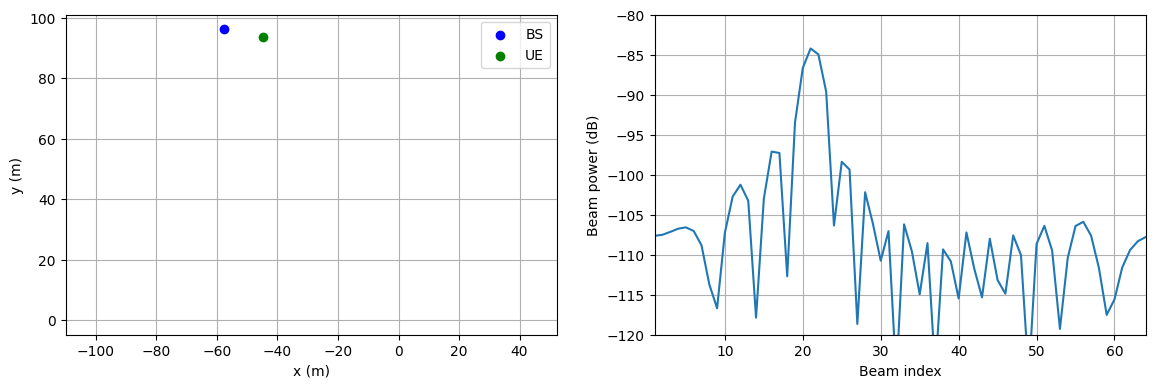

In [15]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# fig.subplots_adjust(hspace=0.5)

# Initialize plots
axes[0].scatter(bs_loc[0], bs_loc[1], color='b', label='BS')
ue_scatter = axes[0].scatter([0], [0], color='g', label='UE')
axes[0].set_xlim([-100, 100])
axes[0].set_ylim([0, 120])
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('y (m)')
axes[0].legend()
axes[0].axis('equal')
axes[0].grid(True)

line, = axes[1].plot(range(1, num_angles + 1), 10 * np.log10(beam_power[0]))
axes[1].set_xlim([1, num_angles])
axes[1].set_ylim([-120, -80])
axes[1].set_xlabel('Beam index')
axes[1].set_ylabel('Beam power (dB)')
axes[1].grid(True)

fig.subplots_adjust(left=0.08, right=0.98, top=0.95, bottom=0.15)



# Update function for animation
def update(i):
    ue_scatter.set_offsets([ue_loc[i][0], ue_loc[i][1]])  # Update UE location
    line.set_data(range(1, num_angles + 1), 10 * np.log10(beam_power[i]))  # Update beam power
    return ue_scatter, line

# Create animation
ani = FuncAnimation(fig, update, frames=num_scene, interval=100, blit=True)

# Display the animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml(default_mode="once"))